# <center>Game Review Predictor</center>

Reading the Dataset
- [Click Here](#Reading-Dataset)

Data Visualization 
- [Click Here](#Data-Visualization )

References
- [Click Here](#References: )

## Reading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#hide Warnings
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('Dataset/bgg-13m-reviews.csv')
dataset.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,sidehacker,10.0,NaN,13,Catan
1,1,Varthlokkur,10.0,NaN,13,Catan
2,2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
4,4,ssmooth,10.0,NaN,13,Catan


In [3]:
dataset=dataset.iloc[:,[2,3]]
dataset

,rating,comment
0,10.0,NaN
1,10.0,NaN
2,10.0,"Currently, this sits on my list as my favorite..."
3,10.0,"I know it says how many plays, but many, many ..."
4,10.0,NaN
...,...,...
13170068,3.0,NaN
13170069,3.0,"Lego created a version of Pictionary, only you..."
13170070,2.5,This game is very similar to Creationary. It c...
13170071,2.0,This game was really bad. Worst that I've pla...


In [4]:
dataset.shape

(13170073, 2)

In [5]:
dataset.dropna(subset=['comment'],inplace=True)
#dataset=dataset.reset_index()
#dataset=dataset.drop(columns=['index'])
dataset

,rating,comment
2,10.0,"Currently, this sits on my list as my favorite..."
3,10.0,"I know it says how many plays, but many, many ..."
7,10.0,i will never tire of this game.. Awesome
11,10.0,This is probably the best game I ever played. ...
16,10.0,Fantastic game. Got me hooked on games all ove...
...,...,...
13170066,3.0,Horrible party game. I'm dumping this one!
13170067,3.0,Difficult to build anything at all with the in...
13170069,3.0,"Lego created a version of Pictionary, only you..."
13170070,2.5,This game is very similar to Creationary. It c...


In [6]:
dataset.shape

(2637756, 2)

## Data Visualization 

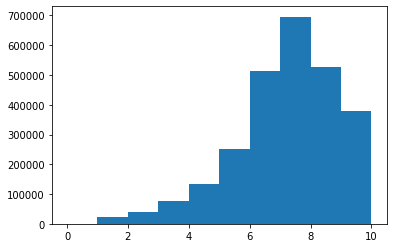

In [7]:
plt.hist(dataset['rating'])
plt.show()

In [8]:
def clean_data(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  
    u"\U0001F300-\U0001F5FF"  
    u"\U0001F680-\U0001F6FF"  
    u"\U0001F1E0-\U0001F1FF"  
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"   "]+", flags=re.UNICODE)
    text = re.sub(r'\n',' ', text) 
    text = re.sub('\s+', ' ', text).strip() 
    return emoji_pattern.sub(r'', text)
    return url.sub(r'',text)

In [9]:
X=dataset['comment'].values
Y=dataset['rating'].values

In [10]:
Y

array([10. , 10. , 10. , ...,  3. ,  2.5,  2. ])

In [11]:
%%time
for index ,rate in enumerate(Y):
    Y[index]=int(round(rate))
Y

CPU times: user 3.82 s, sys: 7.52 ms, total: 3.82 s
Wall time: 3.83 s


array([10., 10., 10., ...,  3.,  2.,  2.])

Sampling The dataset

In [12]:
X_test, X_Sample1, Y_test, Y_Sample1 = train_test_split(X, Y, test_size = 0.1)

In [13]:
X_Sample1.shape

(263776,)

In [14]:
X_train, X_dev, Y_train, Y_dev = train_test_split(X_Sample1, Y_Sample1, test_size = 0.25)

In [15]:
X_train.shape

(197832,)

In [16]:
#set up tfidfvectorizor
tfidf_vectorizor=TfidfVectorizer(stop_words='english', max_df=0.7,max_features=10000)

In [17]:
%%time
#fit and transform train and test set
tfidf_train=tfidf_vectorizor.fit_transform(X_train)

CPU times: user 4.98 s, sys: 100 ms, total: 5.08 s
Wall time: 5.09 s


In [18]:
tfidf_train.shape

(197832, 10000)

In [19]:
%%time
tfidf_dev=tfidf_vectorizor.transform(X_dev)
tfidf_dev.shape

CPU times: user 1.59 s, sys: 21 ms, total: 1.61 s
Wall time: 1.61 s


(65944, 10000)

In [20]:
%%time
# Fitting Naive Bayes to the Training set
#NaiveClassifier = GaussianNB()
#NaiveClassifier.fit(tfidf_train, Y_train)
from sklearn.linear_model import Ridge
classifier=Ridge()
classifier.fit(tfidf_train, Y_train)

CPU times: user 2.65 s, sys: 35.8 ms, total: 2.69 s
Wall time: 763 ms


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
%%time
# Predicting the Test set results
y_pred = np.round(classifier.predict(tfidf_dev))

CPU times: user 4.92 ms, sys: 5.22 ms, total: 10.1 ms
Wall time: 7.68 ms


In [22]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = tfidf_train, y = Y_train, cv = 5)
accuracies.mean()

0.30849819116138416

In [23]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

def range_accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i] or actual[i] == (predicted[i]+1) or actual[i] == (predicted[i]-1) :
            correct += 1
    return correct / float(len(actual)) * 100.0

In [24]:
score=accuracy_metric(Y_dev, np.round(y_pred))
print('Accuracy on development data : {} %'.format(score))

Accuracy on development data : 28.716790003639453 %


In [25]:
score=range_accuracy_metric(Y_dev, np.round(y_pred))
print('Range Accuracy on development data : {} %'.format(score))

Range Accuracy on development data : 72.11876743903919 %


## Saving the model

In [31]:
from sklearn.externals import joblib
#saving the model
joblib.dump(classifier,'model/Ridge_model.sav')
joblib.dump(tfidf_vectorizor,'model/tfidf_model.sav')

/Users/elisontuscano/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model/tfidf_model.sav']

## Final Test on Test Dataset

## References:

1. Dataset:https://www.kaggle.com/jvanelteren/boardgamegeek-reviews 

2. Deploy with Flask : https://www.youtube.com/watch?v=Z1RJmh_OqeA&feature=youtu.be
